In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("talk")

## Q learning model

In [10]:
def simQLearner(learning_rate=None,temperature=None,outcomes=None):

    def softmax(q_matrix, action):
        numerator = np.exp(q_matrix[action]/temperature)
        denominator = np.sum(np.exp(q_matrix/temperature))
        return numerator / denominator

    def updateQ(action,reward):

        prev_q = q_matrix[action]

        # prediction error
        delta = reward - prev_q

        # update
        new_q = prev_q + learning_rate * delta

        q_matrix[action] = new_q

        return q_matrix

    # intialize Q
    q_matrix = np.ones(2) * 0.5
    # intialize action probabilities
    action_probs = np.ones((1,2)) * 0.5

    model_out = {'q0':[],
                 'q1':[],
                 'action':[],
                 'reward':[],
                 'p_choose_left':[],
                 'learning_rate':[],
                 'temperature':[],
                 'trial_number':[]}
    for curr_trial in range(n_trials):

        # Probability of choosing left
        p_choose_left = softmax(q_matrix,0)

        if np.random.uniform() <= p_choose_left:
            action = 0
        else:
            action = 1

        reward = outcomes[curr_trial,action]

        q_matrix = updateQ(action, reward)

        model_out['q0'].append(q_matrix[0])
        model_out['q1'].append(q_matrix[1])
        model_out['action'].append(action)
        model_out['reward'].append(reward)
        model_out['p_choose_left'].append(p_choose_left)
        model_out['learning_rate'].append(learning_rate)
        model_out['temperature'].append(temperature)
        model_out['trial_number'].append(curr_trial)

    model_df = pd.DataFrame(model_out)
    
    return model_df

---
## Simulation Parameters

In [11]:
# number of trials
n_trials = 100

# number of value switches
n_switches = 4

# value of bandit means
means = [0.7, 0.3]

# value of bandit sds
sds = [0.05,0.05]

# learning rates for simulations
learning_rates = [0,0.1,0.5,0.9,1.0]

# temperatures for simulations
temperatures = [0.1, 1.5, 5]

# create and populate matrix with the outcomes for each bandit arm
outcomes = np.zeros([n_trials,2])
bout_length = int(n_trials/n_switches)
high_val = np.random.normal(means[0],sds[0],bout_length)
low_val = np.random.normal(means[1],sds[1],bout_length)
# left option
left = np.array([high_val,low_val] * int(n_switches/2)).flatten()
outcomes[:,0] = left
# right option
right = np.array([low_val,high_val] * int(n_switches/2)).flatten()
outcomes[:,1] = right

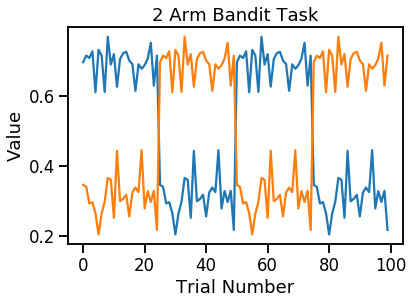

In [12]:
plt.plot(range(len(outcomes)),outcomes)
plt.title("2 Arm Bandit Task")
plt.xlabel("Trial Number")
plt.ylabel("Value");

---
## Run Simulations

In [13]:
# run simulation
simulated_data = []
for alpha in learning_rates:
    for beta in temperatures:
        model_df = simQLearner(learning_rate=alpha,temperature=beta,outcomes=outcomes)
        simulated_data.append(model_df)
simulated_data = pd.concat(simulated_data)

---
## View Results of Simulation

In [14]:
simulated_data.head()

,q0,q1,action,reward,p_choose_left,learning_rate,temperature,trial_number
0,0.5,0.5,1,0.345319,0.5,0.0,0.1,0
1,0.5,0.5,0,0.714001,0.5,0.0,0.1,1
2,0.5,0.5,0,0.707052,0.5,0.0,0.1,2
3,0.5,0.5,0,0.726058,0.5,0.0,0.1,3
4,0.5,0.5,1,0.264485,0.5,0.0,0.1,4


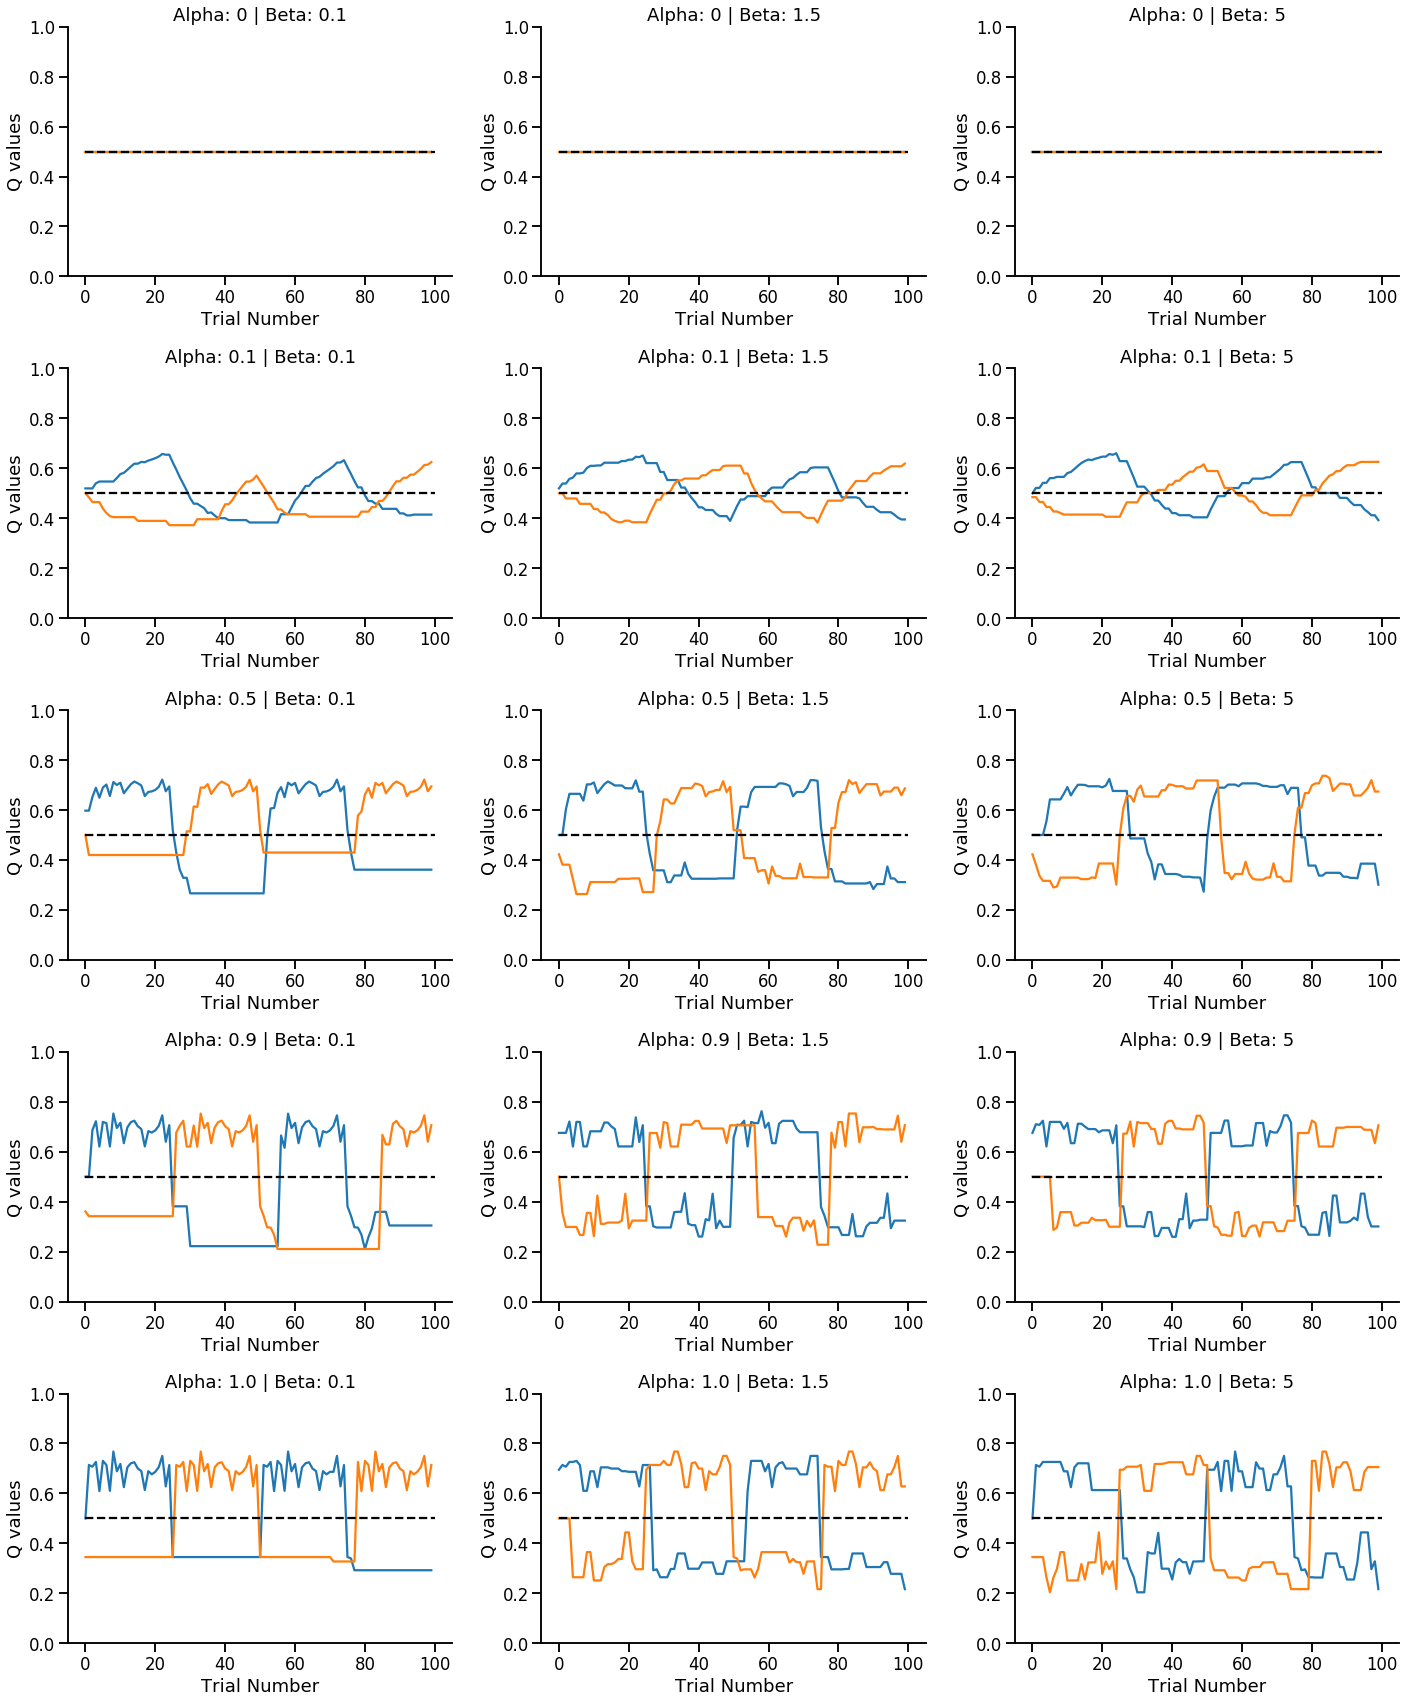

In [15]:
f, axes = plt.subplots(len(learning_rates),len(temperatures),figsize=(20,24))
for i, alpha in enumerate(learning_rates):
    for j, beta in enumerate(temperatures):
        plt_df = simulated_data[(simulated_data.learning_rate == alpha) & (simulated_data.temperature == beta)]
        sns.lineplot(x='trial_number',y="q0",data=plt_df,ax=axes[i,j])
        sns.lineplot(x='trial_number',y="q1",data=plt_df,ax=axes[i,j])
        axes[i,j].set_ylabel("Q values")
        axes[i,j].set_xlabel("Trial Number")
        axes[i,j].set_ylim((0,1))
        axes[i,j].plot((0,n_trials),(0.5,0.5),'k--')
        axes[i,j].set_title("Alpha: %s | Beta: %s"%(alpha, beta))
sns.despine()
plt.tight_layout();

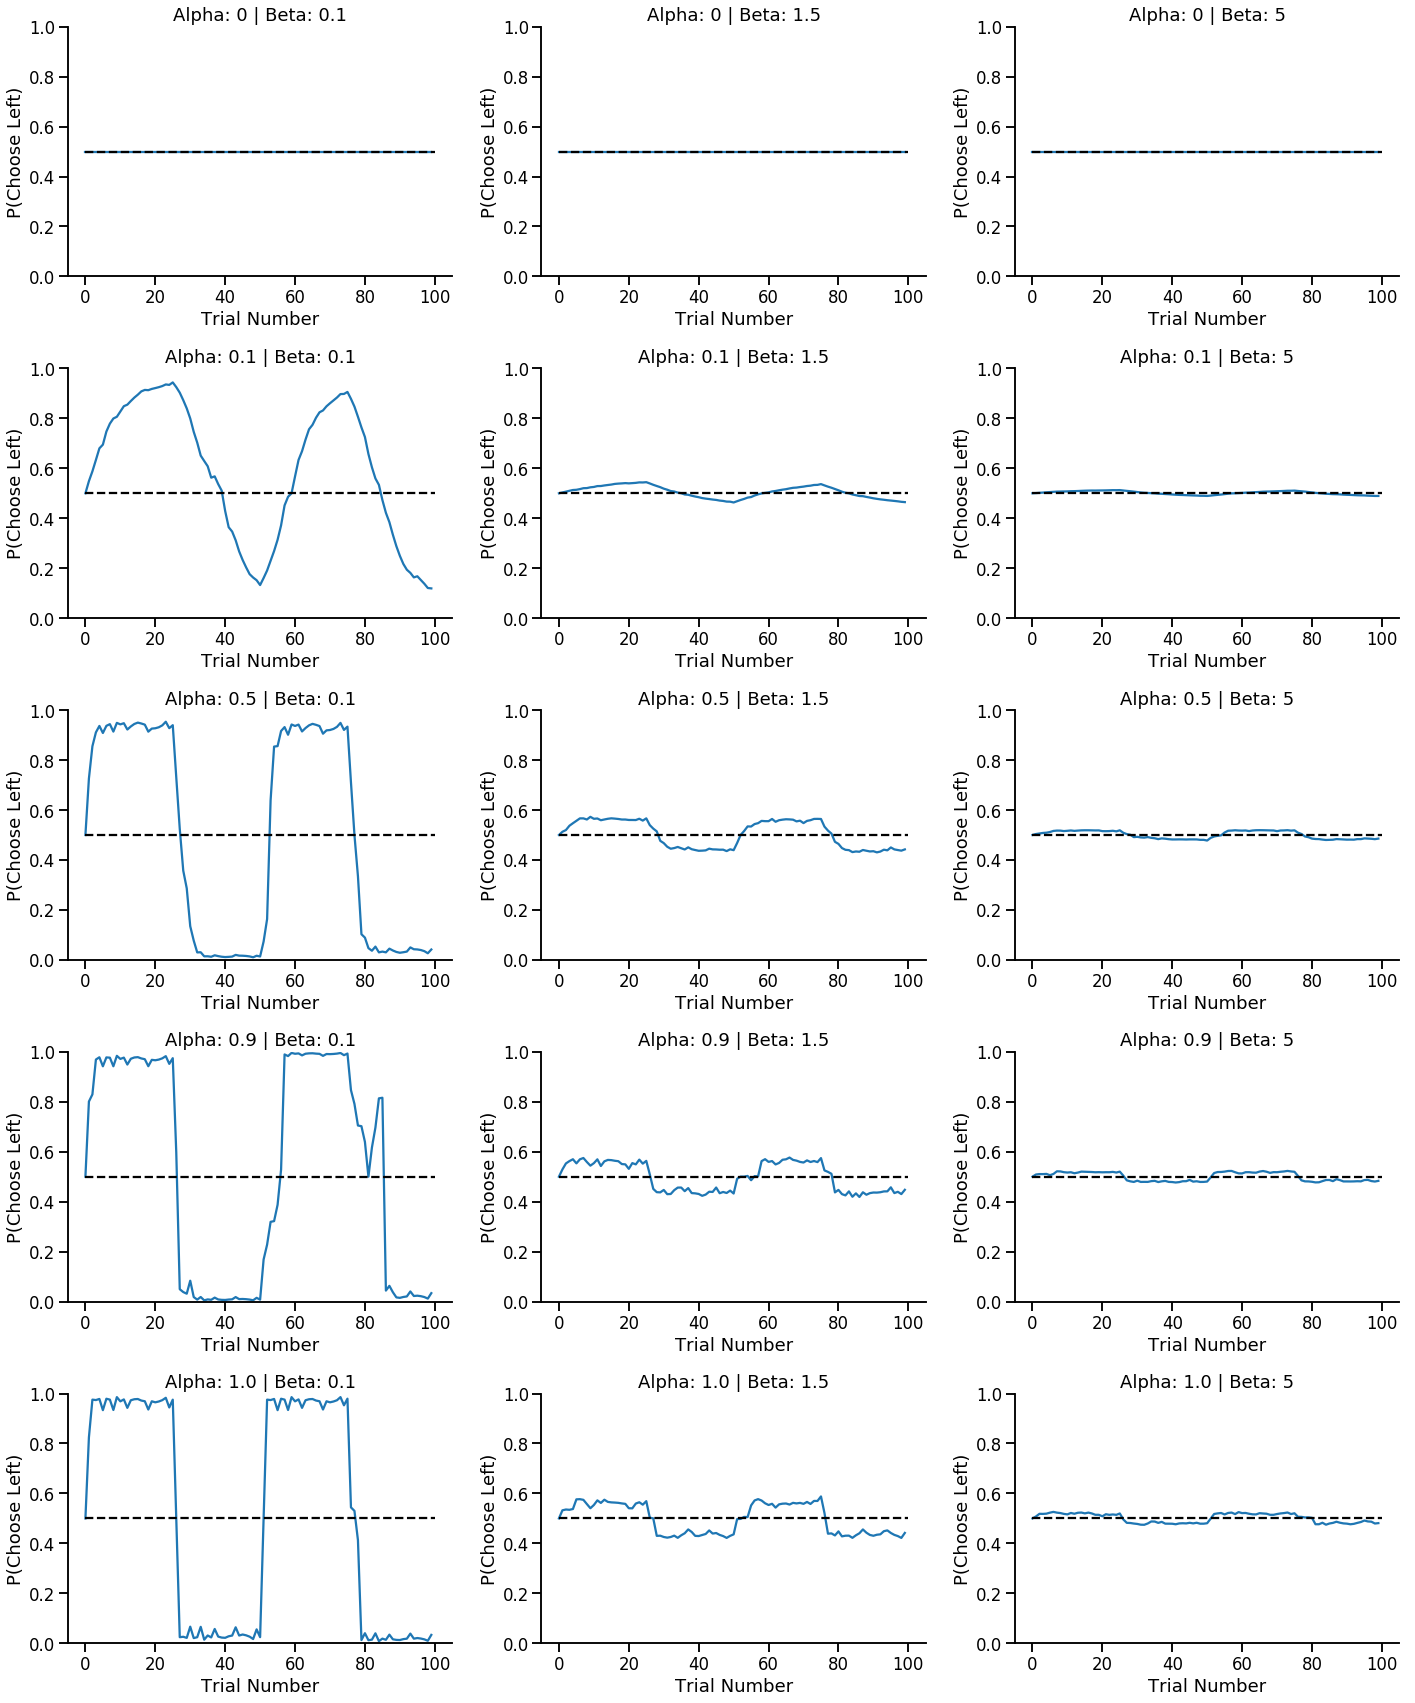

In [16]:
f, axes = plt.subplots(len(learning_rates),len(temperatures),figsize=(20,24))
for i, alpha in enumerate(learning_rates):
    for j, beta in enumerate(temperatures):
        plt_df = simulated_data[(simulated_data.learning_rate == alpha) & (simulated_data.temperature == beta)]
        sns.lineplot(x='trial_number',y="p_choose_left",data=plt_df,ax=axes[i,j])
        axes[i,j].set_ylabel("P(Choose Left)")
        axes[i,j].set_xlabel("Trial Number")
        axes[i,j].set_ylim((0,1))
        axes[i,j].plot((0,n_trials),(0.5,0.5),'k--')
        axes[i,j].set_title("Alpha: %s | Beta: %s"%(alpha, beta))
sns.despine()
plt.tight_layout()